# Calculating the telluric transmission

In this notebook, we show how we can use archNEMESIS to calculate the telluric transmission and correct the spectra from planetary atmospheres taken from ground-based observatories.

These calculations are easily performed using the Telluric class. The information in this class mainly includes information about the Earth's atmosphere and the spectroscopic data to use. In addition, we need to include information about the observatory (i.e., latitude, longitude and altitude) and the observing angle (i.e., emission angle in upward-looking geometry, where 180 indicates looking straight up towards the zenith and 90 indicated looking towards the horizon).

In the following sections, we include some examples about how we can use the Telluric class to compute the telluric transmission spectrum.

In [1]:
import archnemesis as ans
import numpy as np
import matplotlib.pyplot as plt

## 1. Defining the atmosphere

The Telluric class incorporates some functions to easily calculate the properties of the Earth's atmosphere. In particular, there are two main sources of data for this purpose:

- Download the Earth's reference atmospheric profiles from the [ERA5 reanalysis model](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5) of the European Centre for Medium-Range Weather Forecasts. This is performed internally in archNEMESIS by coupling it with the *cdsapi* library, but requires the user to create an account at the Climate Data Store and set up the user information in the machine where archNEMESIS is run from. Information about how to set up the account is given in the following [link](https://cds.climate.copernicus.eu/how-to-api). This atmospheric profiles can be extracted using the built-in function *extract_atmosphere_era5()*.

- Use the reference atmospheric profiles from the [NASA CIRC](https://earth.gsfc.nasa.gov/climate/models/circ/cases) repository. In particular, the main file is stored in the archNEMESIS repository under *Data/reference_profiles/earth_circ_case1.ref*. This atmospheric profiles can be extracted using the built-in function *extract_atmosphere_circ()*.

- Alternatively, we may want to define our own reference atmosphere, for example for including more gases in the atmosphere, or if the telluric transmission needed to be calculated from another planet (e.g., measurements made from the surface of Mars by the Rovers).

### Extracting the Atmosphere from the ERA5 model

2024-10-01 13:36:07,036 INFO Request ID is a87ff301-c8f2-416d-ab80-577a51551159
2024-10-01 13:36:07,166 INFO status has been updated to accepted
2024-10-01 13:42:24,652 INFO status has been updated to successful


16ad3497d5eeb4eed1adc22aac687950.grib:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

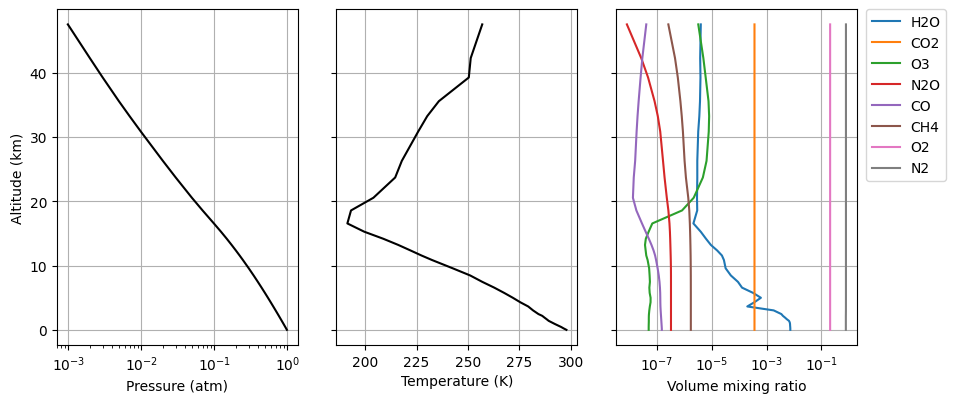

In [2]:
Telluric = ans.Telluric_0()

#Defining the inputs
Telluric.DATE='01-01-2020'      #UTC date of the observation
Telluric.TIME='00:00:00'        #UTC time of the observation
Telluric.LATITUDE=19.82067      #Latitude of the observatory (Mauna Kea, Hawaii)
Telluric.LONGITUDE=-155.46806   #Longitude of the observatory (Mauna Kea, Hawaii)
Telluric.ALTITUDE=4207.3        #Altitude of the observatory (Mauna Kea, Hawaii)
Telluric.EMISS_ANG=180.         #Observing angle, looking straight up to the zenith in this case

#Extracting the atmosphere from the ERA5 model
Telluric.extract_atmosphere_era5()
Telluric.Atmosphere.plot_Atm()

### Extracting the Atmosphere from the NASA CIRC reference profiles

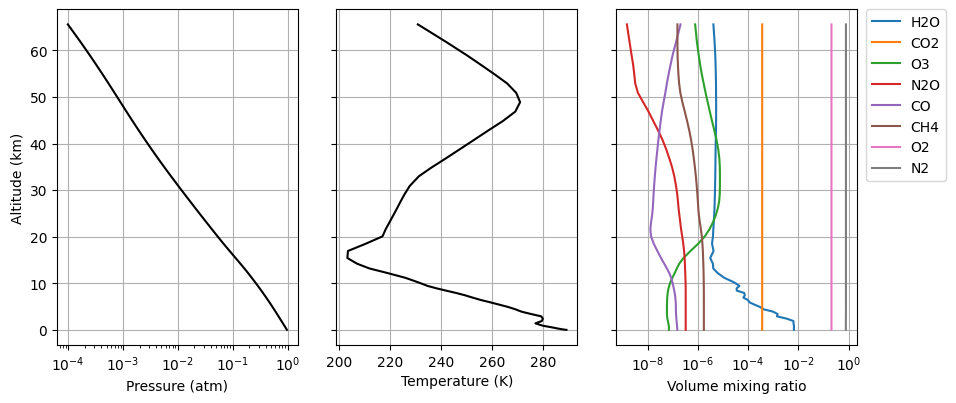

In [3]:
Telluric = ans.Telluric_0()

#Defining the inputs
Telluric.DATE='01-01-2020'      #UTC date of the observation
Telluric.TIME='00:00:00'        #UTC time of the observation
Telluric.LATITUDE=19.82067      #Latitude of the observatory (Mauna Kea, Hawaii)
Telluric.LONGITUDE=-155.46806   #Longitude of the observatory (Mauna Kea, Hawaii)
Telluric.ALTITUDE=4207.3        #Altitude of the observatory (Mauna Kea, Hawaii)
Telluric.EMISS_ANG=180.         #Observing angle, looking straight up to the zenith in this case

#Extracting the atmosphere from the CIRC reference profiles
Telluric.extract_atmosphere_circ()
Telluric.Atmosphere.plot_Atm()

### Defining the Atmosphere explicitly

We can do so by reading or specifying the atmosphere we want. Here, we just use some reference atmosphere from an input *.ref* file.

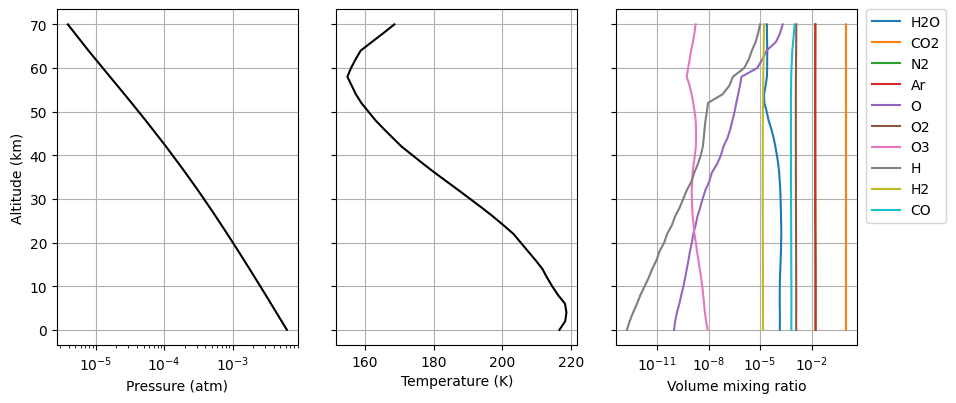

In [4]:
Telluric = ans.Telluric_0()

#Defining the inputs
Telluric.DATE='01-01-2020'      #UTC date of the observation
Telluric.TIME='00:00:00'        #UTC time of the observation
Telluric.LATITUDE=19.82067      #Latitude of the observatory (Mauna Kea, Hawaii)
Telluric.LONGITUDE=-155.46806   #Longitude of the observatory (Mauna Kea, Hawaii)
Telluric.ALTITUDE=4207.3        #Altitude of the observatory (Mauna Kea, Hawaii)
Telluric.EMISS_ANG=180.         #Observing angle, looking straight up to the zenith in this case

#Reading the reference atmosphere from the .ref file
Atmosphere_telluric = ans.Atmosphere_0(runname='mars')
Atmosphere_telluric.read_ref()

#Including the atmosphere into the telluric class
Telluric.Atmosphere = Atmosphere_telluric

Telluric.Atmosphere.plot_Atm()

## 2. Defining the Spectroscopy

The Spectroscopy of the Telluric atmosphere is included in the similar way as we would define the Spectroscopy class for our planetary atmosphere. We just need to include this into the Telluric class

In [5]:
Telluric = ans.Telluric_0()

#Defining the Spectroscopy
Telluric.Spectroscopy = ans.Spectroscopy_0(ILBL=0)
Telluric.Spectroscopy.NGAS = 7 
datadir = '/exomars/data/retrievals/nemesis/Spectroscopy/Ktables/Earth/'
Telluric.Spectroscopy.LOCATION = [datadir+'h2o_all_nims_ext100.kta',
                                  datadir+'co2_all_nims_ext100.kta',
                                  datadir+'o3_all_nims_ext100.kta',
                                  datadir+'n2o_all_nims_ext100.kta',
                                  datadir+'co_all_nims_ext100.kta',
                                  datadir+'ch4_all_nims_ext100.kta',
                                  datadir+'o2_all_nims_ext100.kta']
#Reading the Spectroscopy tables
Telluric.Spectroscopy.read_header()
Telluric.Spectroscopy.summary_info()


Calculation type ILBL ::  0  (k-distribution)
Number of radiatively-active gaseous species ::  7
Gaseous species ::  ['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'O2']
Number of g-ordinates ::  10
Number of spectral points ::  7969
Wavelength range ::  0.4000000059604645 - 100.00000149011612
Step size ::  0.012500000186264515
Spectral resolution of the k-tables (FWHM) ::  0.02500000037252903
Number of temperature levels ::  20
Temperature range ::  70.0 - 400.0 K
Number of pressure levels ::  20
Pressure range ::  3.0590232e-07 - 20.085537 atm


## 3. Calculating the telluric transmission

Finally, once we have this information in the Telluric class, we can easily calculate the telluric transmission using the built-in function *calc_transmission()*.

Here, we show two examples for this as if we were measuring from the telescopes on Manua Kea, Hawaii, or from the surface of Mars, in a spectral range between 0-40 $\mu$m.

### Earth telluric transmission from Manua Kea

In [6]:
Telluric = ans.Telluric_0()

#Defining the inputs
Telluric.DATE='01-01-2020'      #UTC date of the observation
Telluric.TIME='00:00:00'        #UTC time of the observation
Telluric.LATITUDE=19.82067      #Latitude of the observatory (Mauna Kea, Hawaii)
Telluric.LONGITUDE=-155.46806   #Longitude of the observatory (Mauna Kea, Hawaii)
Telluric.ALTITUDE=4207.3        #Altitude of the observatory (Mauna Kea, Hawaii)
Telluric.EMISS_ANG=180.         #Observing angle, looking straight up to the zenith in this case

#Extracting the atmosphere from the CIRC reference profiles
Telluric.extract_atmosphere_circ()

#Defining the Spectroscopy
Telluric.Spectroscopy = ans.Spectroscopy_0(ILBL=0)
Telluric.Spectroscopy.NGAS = 7 
datadir = '/exomars/data/retrievals/nemesis/Spectroscopy/Ktables/Earth/'
Telluric.Spectroscopy.LOCATION = [datadir+'h2o_all_nims_ext100.kta',
                                  datadir+'co2_all_nims_ext100.kta',
                                  datadir+'o3_all_nims_ext100.kta',
                                  datadir+'n2o_all_nims_ext100.kta',
                                  datadir+'co_all_nims_ext100.kta',
                                  datadir+'ch4_all_nims_ext100.kta',
                                  datadir+'o2_all_nims_ext100.kta']
#Reading the Spectroscopy tables
Telluric.Spectroscopy.read_header()
Telluric.Spectroscopy.read_tables(wavemin=0.,wavemax=40.)

WAVE,TRANSMISSION = Telluric.calc_transmission()

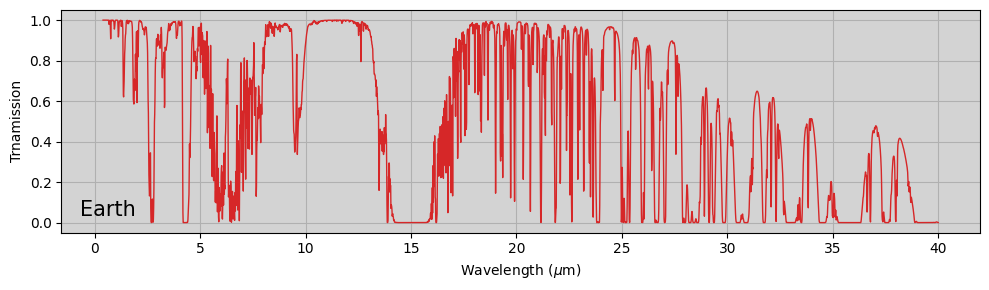

In [7]:
fig,ax1 = plt.subplots(1,1,figsize=(10,3))
ax1.plot(WAVE,TRANSMISSION,linewidth=1.,c='tab:red')
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Trnamission')
ax1.set_facecolor('lightgray')
ax1.text(0.02, 0.1, 'Earth', horizontalalignment='left',verticalalignment='center', transform=ax1.transAxes,fontsize=15)
ax1.grid()
plt.tight_layout()

### Transmission from the surface of Mars

In [8]:
Telluric = ans.Telluric_0()

#Defining the inputs
Telluric.DATE='01-01-2020'      #UTC date of the observation
Telluric.TIME='00:00:00'        #UTC time of the observation
Telluric.LATITUDE=0.            #Latitude of the observatory 
Telluric.LONGITUDE=0.          #Longitude of the observatory 
Telluric.ALTITUDE=0.            #Altitude of the observatory
Telluric.EMISS_ANG=180.         #Observing angle, looking straight up to the zenith in this case

#Reading the reference atmosphere from the .ref file
Atmosphere_telluric = ans.Atmosphere_0(runname='mars')
Atmosphere_telluric.read_ref()

#Including the atmosphere into the telluric class
Telluric.Atmosphere = Atmosphere_telluric

#Defining the Spectroscopy
Telluric.Spectroscopy = ans.Spectroscopy_0(ILBL=0)
Telluric.Spectroscopy.NGAS = 5 
datadir = '/exomars/data/retrievals/nemesis/Spectroscopy/Ktables/Earth/'
Telluric.Spectroscopy.LOCATION = [datadir+'h2o_all_nims_ext100.kta',
                                  datadir+'co2_all_nims_ext100.kta',
                                  datadir+'o3_all_nims_ext100.kta',
                                  datadir+'co_all_nims_ext100.kta',
                                  datadir+'o2_all_nims_ext100.kta']
#Reading the Spectroscopy tables
Telluric.Spectroscopy.read_header()
Telluric.Spectroscopy.read_tables(wavemin=0.,wavemax=40.)

WAVE,TRANSMISSION = Telluric.calc_transmission()

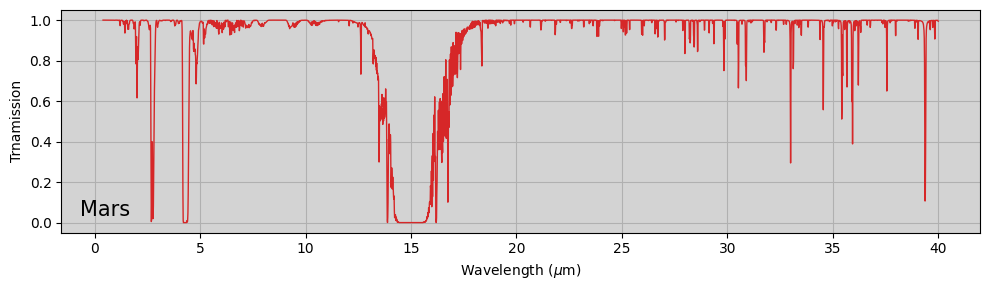

In [9]:
fig,ax1 = plt.subplots(1,1,figsize=(10,3))
ax1.plot(WAVE,TRANSMISSION,linewidth=1.,c='tab:red')
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Trnamission')
ax1.set_facecolor('lightgray')
ax1.text(0.02, 0.1, 'Mars', horizontalalignment='left',verticalalignment='center', transform=ax1.transAxes,fontsize=15)
ax1.grid()
plt.tight_layout()

## 4. Reading the Telluric information from the input files

Similarly to other classes, the information about the Telluric absorption can be read from the archNEMESIS HDF5 input file. In this section, we show how we can use the built-in functions in the telluric class to read this information.

### Writing the HDF5 file

In [10]:
#Defining the class
##########################################################################################

Telluric = ans.Telluric_0()

#Defining the inputs
Telluric.DATE='01-01-2020'      #UTC date of the observation
Telluric.TIME='00:00:00'        #UTC time of the observation
Telluric.LATITUDE=19.82067      #Latitude of the observatory (Mauna Kea, Hawaii)
Telluric.LONGITUDE=-155.46806   #Longitude of the observatory (Mauna Kea, Hawaii)
Telluric.ALTITUDE=4207.3        #Altitude of the observatory (Mauna Kea, Hawaii)
Telluric.EMISS_ANG=180.         #Observing angle, looking straight up to the zenith in this case

#Extracting the atmosphere from the CIRC reference profiles
Telluric.extract_atmosphere_circ()

#Defining the Spectroscopy
Telluric.Spectroscopy = ans.Spectroscopy_0(ILBL=0)
Telluric.Spectroscopy.NGAS = 7 
datadir = '/exomars/data/retrievals/nemesis/Spectroscopy/Ktables/Earth/'
Telluric.Spectroscopy.LOCATION = [datadir+'h2o_all_nims_ext100.kta',
                                  datadir+'co2_all_nims_ext100.kta',
                                  datadir+'o3_all_nims_ext100.kta',
                                  datadir+'n2o_all_nims_ext100.kta',
                                  datadir+'co_all_nims_ext100.kta',
                                  datadir+'ch4_all_nims_ext100.kta',
                                  datadir+'o2_all_nims_ext100.kta']

#Writing the HDF5 file
############################################################################################

Telluric.write_hdf5('example_telluric')



### Reading the HDF5 file

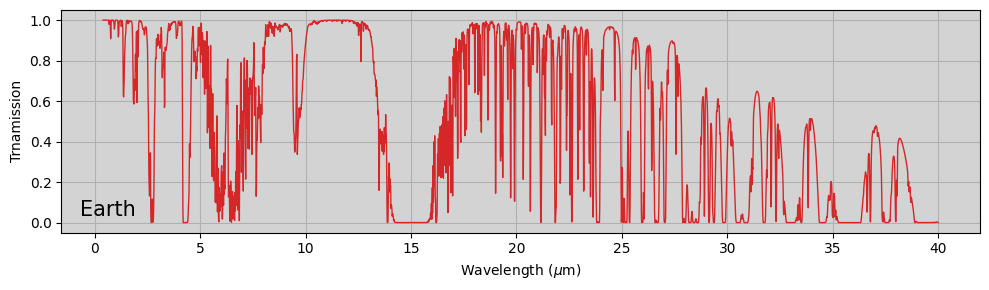

In [11]:
#Initialising the class
############################################################################################

Telluric = ans.Telluric_0()

#Reading the HDF5 file
############################################################################################

Telluric.read_hdf5('example_telluric')

#Reading the Spectroscopy tables
Telluric.Spectroscopy.read_header()
Telluric.Spectroscopy.read_tables(wavemin=0.,wavemax=40.)

#Calculating example transmission
#############################################################################################

WAVE,TRANSMISSION = Telluric.calc_transmission()

fig,ax1 = plt.subplots(1,1,figsize=(10,3))
ax1.plot(WAVE,TRANSMISSION,linewidth=1.,c='tab:red')
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Trnamission')
ax1.set_facecolor('lightgray')
ax1.text(0.02, 0.1, 'Earth', horizontalalignment='left',verticalalignment='center', transform=ax1.transAxes,fontsize=15)
ax1.grid()
plt.tight_layout()